# First Try

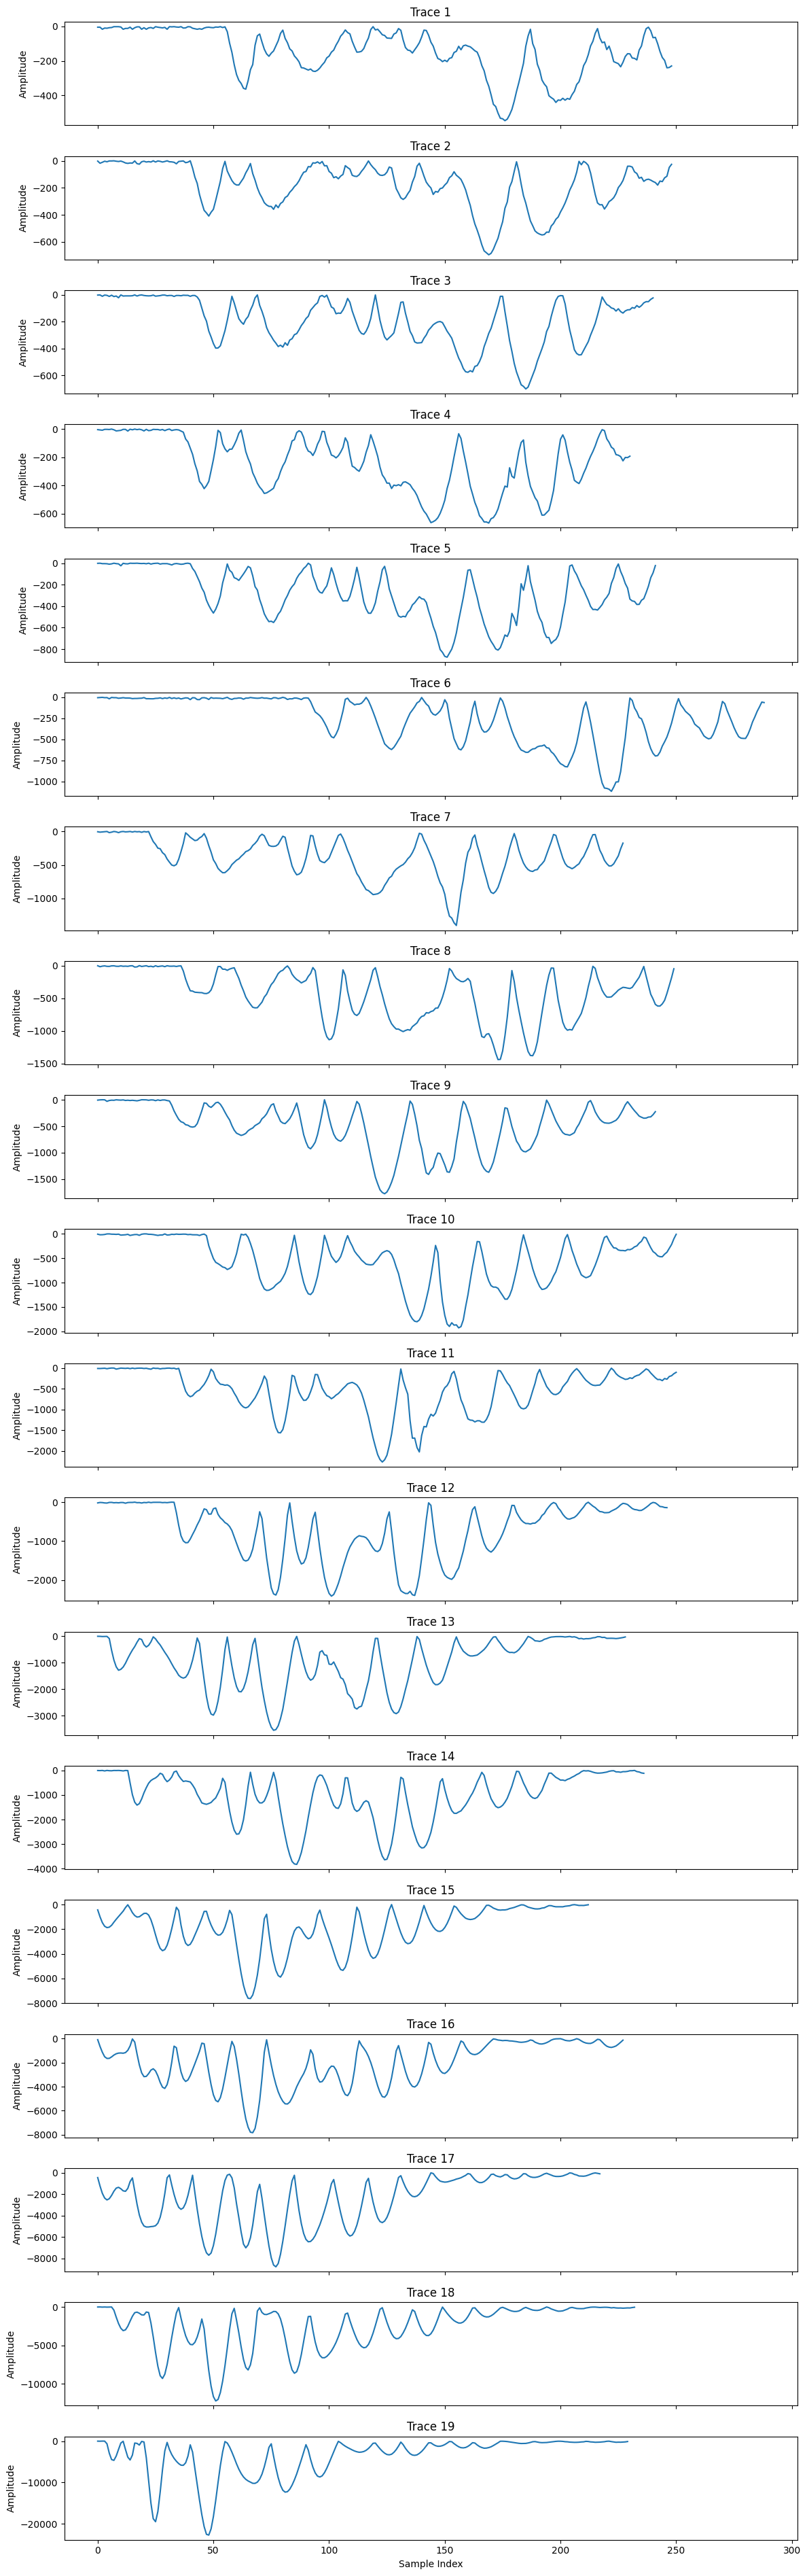

In [110]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

# Open the SEG-Y file with ignore_geometry=True
with segyio.open('29003.sgy', "r", ignore_geometry=True) as f:
    # Get the total number of traces
    num_traces = f.tracecount
    
    # Create subplots
    fig, axes = plt.subplots(num_traces, 1, figsize=(12, num_traces * 2), sharex=True)
    
    # Iterate over all traces
    for i in range(num_traces):
        trace = f.trace[i]
        # Process each trace
        filtered = trace[np.where(trace < 1e-2)]
        
        # Plot the trace in a subplot
        axes[i].plot(filtered)
        axes[i].set_title(f'Trace {i+1}')
        axes[i].set_ylabel('Amplitude')
    
    # Add a common x-label
    plt.xlabel('Sample Index')
    plt.tight_layout()
    plt.show()


# Seismic Data Section

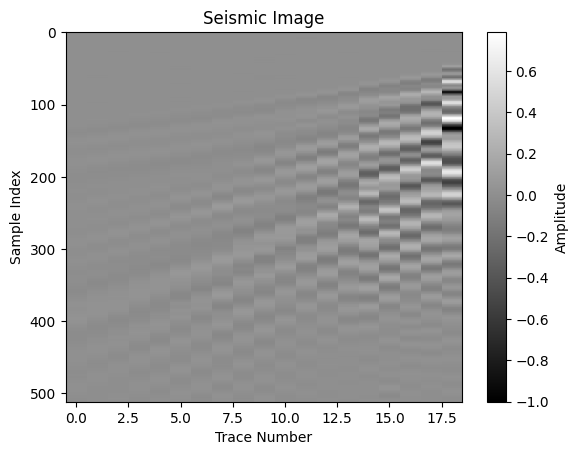

In [111]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

# Open the SEG-Y file with ignore_geometry=True
with segyio.open('29003.sgy', "r", ignore_geometry=True) as f:
    # Initialize an array to hold the seismic data
    num_traces = len(f.trace)
    num_samples = len(f.trace[0])
    seismic_data = np.zeros((num_traces, num_samples))
    
    # Iterate over all traces and store them in the array
    for i, trace in enumerate(f.trace):
        seismic_data[i, :] = trace
    
    # Normalize the seismic data for better visualization
    seismic_data /= np.max(np.abs(seismic_data))
    
    # Plot the seismic image
    plt.imshow(seismic_data.T, aspect='auto', cmap='grey', interpolation='none')
    plt.colorbar(label='Amplitude')
    plt.xlabel('Trace Number')
    plt.ylabel('Sample Index')
    plt.title('Seismic Image')
    plt.show()

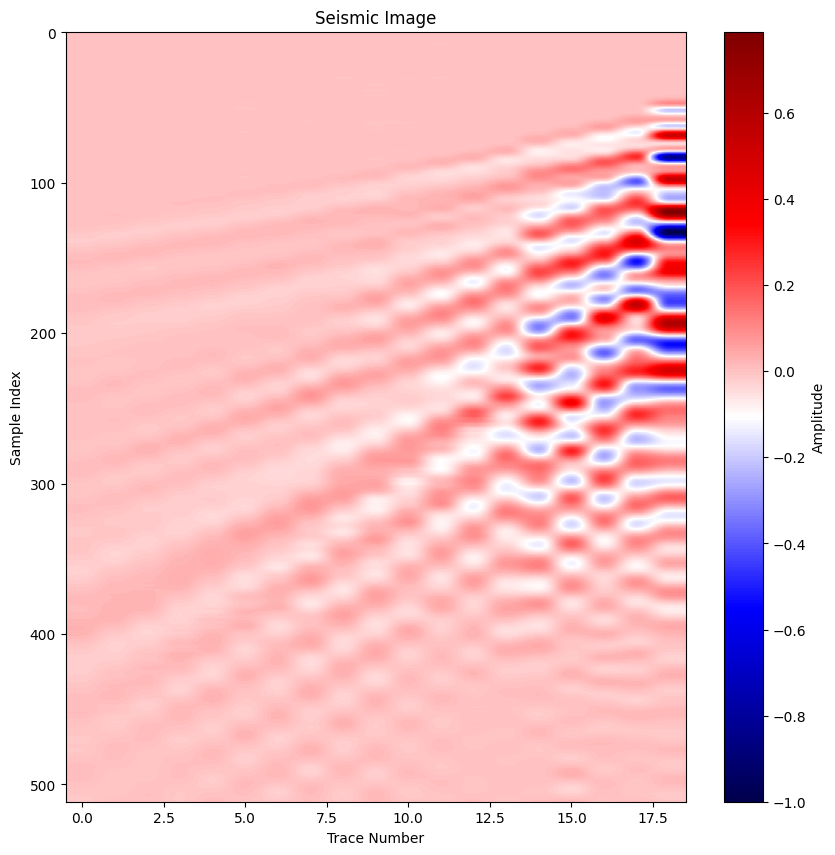

In [112]:
plt.figure(figsize=(10, 10))
plt.imshow(seismic_data.T, aspect='auto', cmap='seismic')
plt.colorbar(label='Amplitude')
plt.xlabel('Trace Number')
plt.ylabel('Sample Index')
plt.title('Seismic Image')
plt.show()

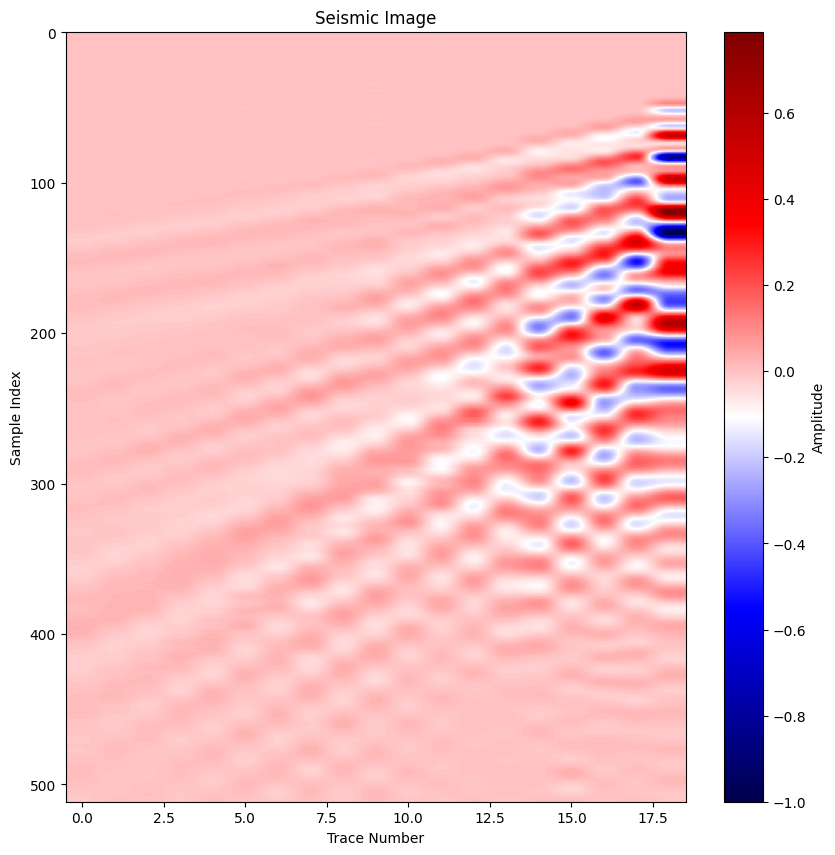

In [113]:
plt.figure(figsize=(10, 10))
plt.imshow(seismic_data.T, aspect='auto', cmap='seismic', interpolation='hermite')
plt.colorbar(label='Amplitude')
plt.xlabel('Trace Number')
plt.ylabel('Sample Index')
plt.title('Seismic Image')
plt.show()

In [114]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

## Read the SEG-Y file using segyio

In [115]:
with segyio.open(file_path, "r", ignore_geometry=True) as segyfile:
    print("Number of traces:", segyfile.tracecount)
    print("Number of samples per trace:", segyfile.samples.size)
    data = np.zeros((segyfile.tracecount, segyfile.samples.size))
    for i in range(segyfile.tracecount):
        data[i, :] = segyfile.trace[i]

Number of traces: 19
Number of samples per trace: 512


# Dispersion Image

I tried to create a Dispersion Image from a .SG2 format data. First of all, I used [FRONT END EXPRESS](https://geogiga.com/products/frontend/) to convert my data format from .SG2 to .SGY because, according to my research, there is no good built-in feature to import .SG2 data.

In [116]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

## Load your SEG-Y data

In [117]:
sgy_file = '29003.sgy'
st = obspy.read(sgy_file)

## Extract data and sampling rate

In [118]:
data = np.array([tr.data for tr in st])
fs = st[0].stats.sampling_rate

## Compute the spectrogram for each trace

In [119]:
f, t, Sxx = spectrogram(data, fs=fs, axis=-1)

## Sum the spectrograms to get the dispersion image

In [120]:
dispersion_image = np.sum(Sxx, axis=0)

## Plot the dispersion image

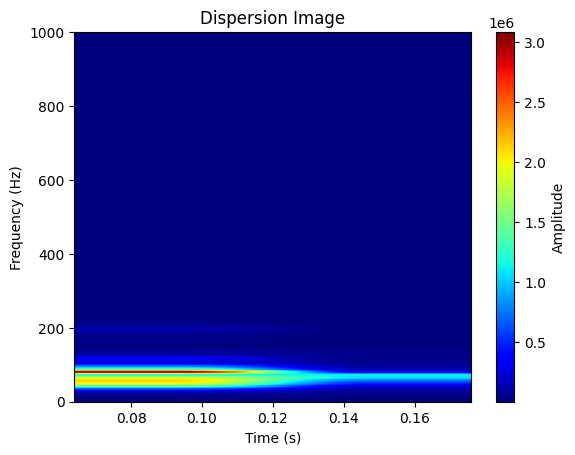

In [121]:
plt.imshow(dispersion_image, aspect='auto', extent=[t[0], t[-1], f[0], f[-1]], origin='lower', cmap='jet')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Dispersion Image')
plt.show()

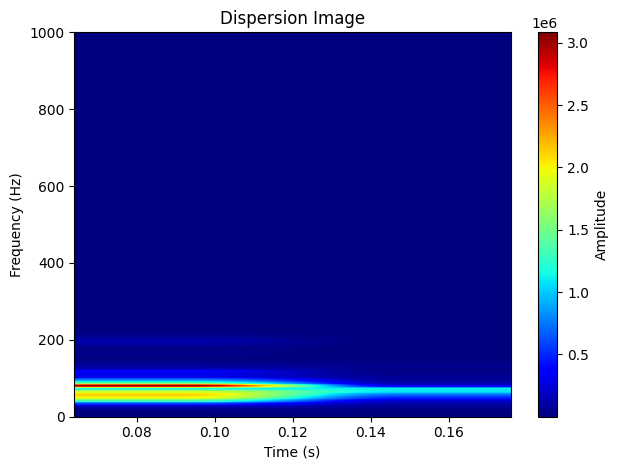

In [122]:
plt.imshow(dispersion_image, aspect='auto', extent=[t[0], t[-1], f[0], f[-1]], origin='lower', cmap='jet')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Dispersion Image')
plt.tight_layout() 
plt.show()

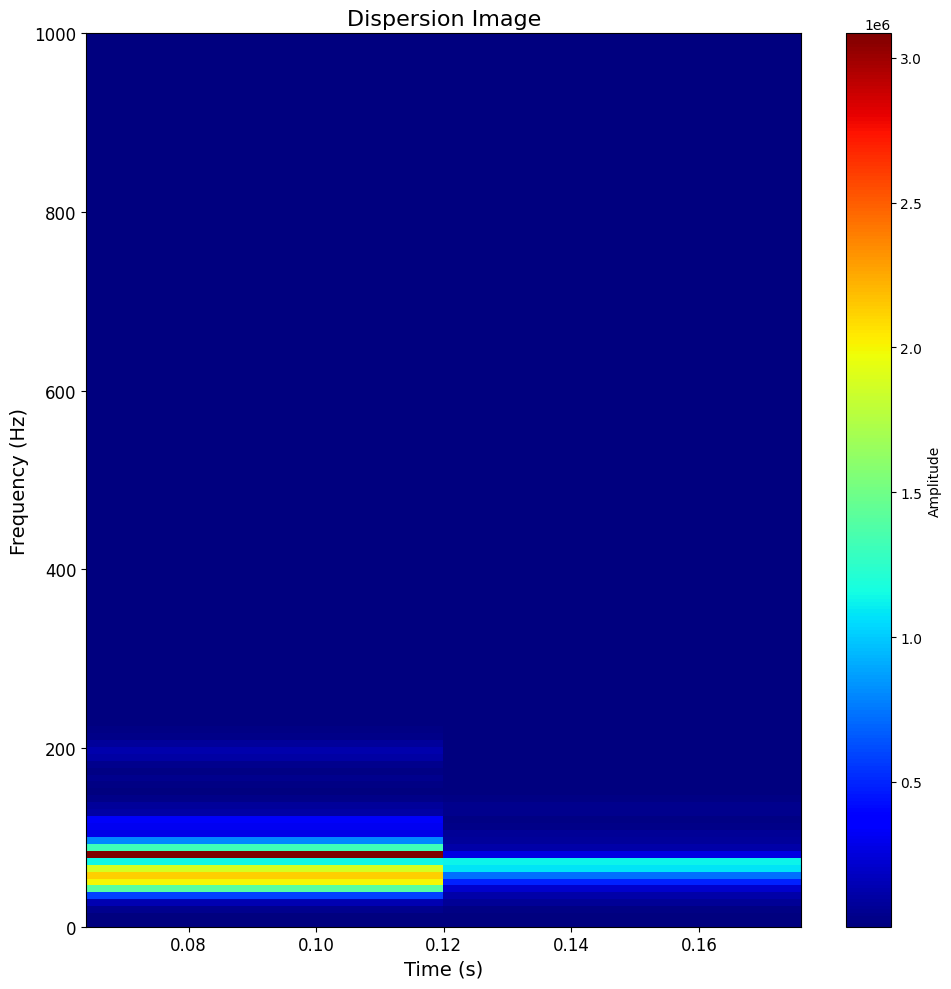

In [123]:
plt.figure(figsize=(10, 10))
plt.imshow(dispersion_image, aspect='auto', extent=[t[0], t[-1], f[0], f[-1]], origin='lower', cmap='jet')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Frequency (Hz)', fontsize=14)
plt.title('Dispersion Image', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

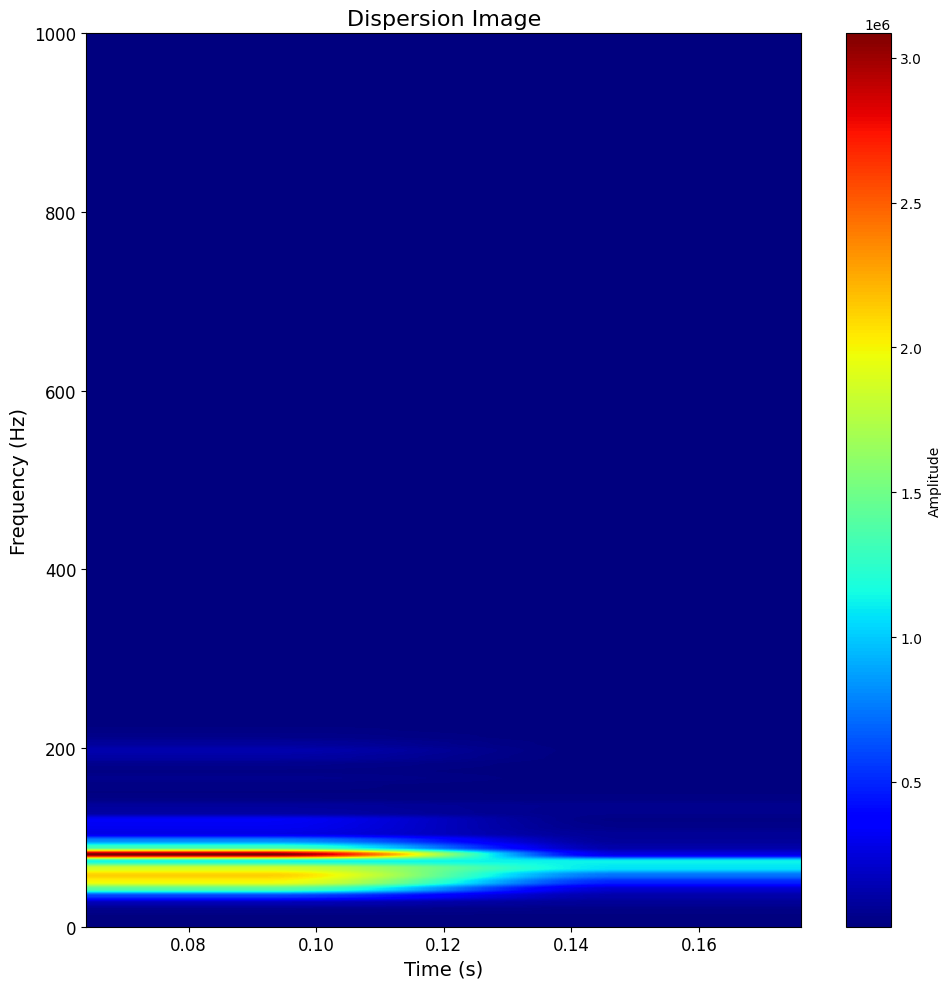

In [124]:
plt.figure(figsize=(10, 10))
plt.imshow(dispersion_image, aspect='auto', extent=[t[0], t[-1], f[0], f[-1]], origin='lower', cmap='jet', interpolation='hermite')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Frequency (Hz)', fontsize=14)
plt.title('Dispersion Image', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()